In [1]:
from astropy.table import Table
import gundam as gun
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#FWISE = '/home/edonoso/incubator/wiseagn/C75_gmmclass.parquet'                  # WISE AGN with classifications given by gmm_split.ipynb
#FGAL  = '/home/edonoso/incubator/hsc/hsc_mask_hats/masked_hscx_c_gal.parquet'   # HSC galaxies in mask
#FRAN  = '/home/edonoso/incubator/hsc/hsc_mask/rands100_1.fits'                  # Pool of 100 mill. randoms in mask
FWISE = '/home/edonoso/incubator/wiseagn/C75_hpwm_gmmclass.parquet'             # WISE AGN with classifications given by gmm_split.ipynb
FGAL  = '/home/edonoso/incubator/hsc/hsc_mask_hats/masked_hpwm_hscx_c_gal.parquet'   # HSC galaxies in mask
FRAN  = '/home/edonoso/incubator/wiseagn/hpwm_randoms.parquet'                  # Pool of 100 mill. randoms in mask

## Select WISEAGN, galaxies and randoms
Use this section to pick objects in different redshifts ranges or with different selection. For WISE AGN, manipulate flag to pick obscured/unobscured/uncertain. Since it takes a while, save these to disk. Once generated, proceed directly to PCCF

In [4]:
pick_obscured   = True
catout          = 'hpwm_agnobsc.fits'
z1              = 0.5  #low-z limit
z2              = 1.0  #high-z limit
if pick_obscured:
    print('READING WISEAGN ==================================================')
    qso = Table.from_pandas(pd.read_parquet(FWISE))
    print('...sources :', len(qso))
    # Subsample quasars
    idx_z = (qso['photoz_best_pz'] > z1) & (qso['photoz_best_pz'] < z2)
    idx_c = (qso['agn_class'] == 1.0)
    idx_snrw3 = (qso['w3snr'] >= 3.)
    idx = idx_z & idx_c & idx_snrw3
    qso = qso[idx]
    print('...sources within selection: ', len(qso))
    qso['wei'] = 1.0
    
    qso['photoz_best_pz'].name = 'z'  # rename to make typing easier
    
    print('Writing Obscured WISEAGN ============================================')
    #qso['ra','dec','z','wei'].write(catout, overwrite=True)
    qso.write(catout, overwrite=True)

READING WISEAGN ==================================================
...sources : 370055
...sources within selection:  10207
Writing Obscured WISEAGN ============================================


In [5]:
pick_unobscured = True
catout          = 'hpwm_agnunobsc.fits'
z1              = 0.5  #low-z limit
z2              = 1.0  #high-z limit
if pick_unobscured:
    print('READING WISEAGN ==================================================')
    qso = Table.from_pandas(pd.read_parquet(FWISE))
    print('...sources :', len(qso))
    # Subsample quasars
    idx_z = (qso['photoz_best_pz'] > z1) & (qso['photoz_best_pz'] < z2)
    idx_c = (qso['agn_class'] == 0.0)
    idx_snrw3 = (qso['w3snr'] >= 3.)
    idx = idx_z & idx_c & idx_snrw3
    qso = qso[idx]
    print('...sources within selection: ', len(qso))
    qso['wei'] = 1.0
    
    qso['photoz_best_pz'].name = 'z'  # rename to make typing easier
    
    print('Writing Unobscured WISEAGN ============================================')
    #qso['ra','dec','z','wei'].write(catout, overwrite=True)
    qso.write(catout, overwrite=True)

READING WISEAGN ==================================================
...sources : 370055
...sources within selection:  2962
Writing Unobscured WISEAGN ============================================


In [3]:
pick_uncertain = True
catout          = 'hpwm_agnunc.fits'
z1              = 0.5  #low-z limit
z2              = 1.0  #high-z limit
if pick_uncertain:
    print('READING WISEAGN ==================================================')
    qso = Table.from_pandas(pd.read_parquet(FWISE))
    print('...sources :', len(qso))
    # Subsample quasars
    idx_z = (qso['photoz_best_pz'] > z1) & (qso['photoz_best_pz'] < z2)
    idx_c = (qso['agn_class'] == 2.0)
    idx_snrw3 = (qso['w3snr'] >= 3.)
    idx = idx_z & idx_c & idx_snrw3
    qso = qso[idx]
    print('...sources within selection: ', len(qso))
    qso['wei'] = 1.0
    
    qso['photoz_best_pz'].name = 'z'  # rename to make typing easier
    
    print('Writing Uncertain WISEAGN ============================================')
    qso['ra','dec','z','wei'].write(catout, overwrite=True)

READING WISEAGN ==================================================
...sources : 370055
...sources within selection:  2707
Writing Uncertain WISEAGN ============================================


In [5]:
pick_obscuredPu = True
catout          = 'hpwm_agnobscPu.fits'
z1              = 0.5  #low-z limit
z2              = 1.0  #high-z limit
if pick_obscuredPu:
    print('READING WISEAGN ==================================================')
    qso = Table.from_pandas(pd.read_parquet(FWISE))
    print('...sources :', len(qso))
    # Subsample quasars
    idx_z = (qso['photoz_best_pz'] > z1) & (qso['photoz_best_pz'] < z2)
    idx_c = (qso['agn_class'] == 1.0) | (qso['agn_class'] == 2.0)
    idx_snrw3 = (qso['w3snr'] >= 3.)
    idx = idx_z & idx_c & idx_snrw3
    qso = qso[idx]
    print('...sources within selection: ', len(qso))
    qso['wei'] = 1.0
    
    qso['photoz_best_pz'].name = 'z'  # rename to make typing easier
    
    print('Writing Obscured+Unc WISEAGN ============================================')
    qso['ra','dec','z','wei'].write(catout, overwrite=True)

READING WISEAGN ==================================================
...sources : 370055
...sources within selection:  12914
Writing Obscured+Unc WISEAGN ============================================


In [4]:
pick_unobscuredPu = True
catout            = 'hpwm_agnunobscPu.fits'
z1                = 0.5  #low-z limit
z2                = 1.0  #high-z limit
if pick_unobscuredPu:
    print('READING WISEAGN ==================================================')
    qso = Table.from_pandas(pd.read_parquet(FWISE))
    print('...sources :', len(qso))
    # Subsample quasars
    idx_z = (qso['photoz_best_pz'] > z1) & (qso['photoz_best_pz'] < z2)
    idx_c = (qso['agn_class'] == 0.0) | (qso['agn_class'] == 2.0)
    idx_snrw3 = (qso['w3snr'] >= 3.)
    idx = idx_z & idx_c & idx_snrw3
    qso = qso[idx]
    print('...sources within selection: ', len(qso))
    qso['wei'] = 1.0
    
    qso['photoz_best_pz'].name = 'z'  # rename to make typing easier
    
    print('Writing Unobscured WISEAGN ============================================')
    qso['ra','dec','z','wei'].write(catout, overwrite=True)

READING WISEAGN ==================================================
...sources : 370055
...sources within selection:  5669
Writing Unobscured WISEAGN ============================================


In [14]:
pick_galaxies  = True
catout         = 'hpwm_0510_gals.fits'
z1              = 0.5  #low-z limit
z2              = 1.0  #high-z limit
if pick_galaxies:
    print('READING GALAXIES ==================================================')
    gals = Table.read(FGAL)
    print('...sources :', len(gals))
    # Subsample galaxies
    imc = 24.0
    gmrc = 1.2
    rmic = 1.0
    idx_z = (gals['photoz_best_pz'] > z1) & (gals['photoz_best_pz'] < z2)
    idx_mi = (gals['i_cmodel_mag'] < imc)
    idx_color1 = ((gals['g_cmodel_mag'] - gals['r_cmodel_mag']) > gmrc)
    idx_color2 = ((gals['r_cmodel_mag'] - gals['i_cmodel_mag']) > rmic)
    idx = idx_z & idx_mi & idx_color1 & idx_color2
    gals = gals[idx]
    print('...sources within selection: ', len(gals))
    gals['wei'] = 1.0

    gals['photoz_best_pz'].name = 'z'  # rename to make typing easier
    
    print('Writing GALAXIES ============================================')
    gals.write(catout, overwrite=True)

READING GALAXIES ==================================================
...sources : 82649343
...sources within selection:  2535253
Writing GALAXIES ============================================


In [15]:
pick_randoms  = True
catout        = 'hpwm_0510_rans.fits'
if pick_randoms:
    print('READING RANDOMS ================================================')
    rans = Table.read(FRAN)  # read randoms big pool
    print('...sources :', len(rans))
    # Subsample randoms
    rans = rans[:25_000_000]  #14
    print('...sources within selection: ', len(rans))
    # choose randoms redshift following the galaxies ditribution
    rans['z'] = np.random.choice(gals['z'], size=len(rans))
    rans['wei'] = 1.0

    print('Writing RANDOMS ============================================')
    rans['ra','dec','z','wei'].write(catout, overwrite=True)

READING RANDOMS ================================================
...sources : 100000000
...sources within selection:  25000000
Writing RANDOMS ============================================


## PCCF
------------------------

### Unobscured

In [3]:
## If needed, read fits from disk to save memory and time
#qso = Table.read('agnunobsc.fits')
#gals = Table.read('0510_gals.fits')
#rans = Table.read('0510_rans.fits')
## Create parameters and set output file name
#par = gun.packpars(kind='pccf', outfn='unobsc_lrg_0510', doboot=True)
#par.nsepv = 1 ; par.dsepv=250

In [3]:
# If needed, read fits from disk to save memory and time
qso = Table.read('hpwm_agnunobsc.fits')
gals = Table.read('hpwm_0510_gals.fits')
rans = Table.read('hpwm_0510_rans.fits')
# Create parameters and set output file name
par = gun.packpars(kind='pccf', outfn='hpwm_unobsc_lrg_0510', doboot=True)
par.nsepv = 1 ; par.dsepv=250

In [4]:
# Compute
cnt = gun.pccf(gals, rans, qso, par, nthreads=28, plot=False)

START!   03/19/25  12:15:18
Name of output set to : hpwm_unobsc_lrg_0510
Calling Information  ================================================
table        = 
table_nrows  = 2535253
table1       = 
table1_nrows = 25000000
table2       = 
table2_nrows = 2962
nthreads     = 28
write        = True
plot         = False
Comov_dist_tab compute time (s) : 1.085
Comov_dist_tab1 compute time (s) : 1.465
Comov_dist_tab2 compute time (s) : 0.325
Sample boundaries : (0.00000, 360.00000, -6.60810, 53.27193, 1344.87821, 2295.60449)
Sample seems to cross RA=0 : True
Custom RA boundaries : None
SK Autogrid ON
SK cell target density      : 18.000
SK grid size [dec,ra,dcom]  : [265, 1924, 3]
Pixsort time (s)            : 29.124
SK-LL tables build time (s) : 7.463
====  Counting CD pairs in 265 DEC strips  =====
      [for progress updates check hpwm_unobsc_lrg_0510.fortran.log]
  
Done with CD calculations. Looptime (s) : 5.977
====  Counting CD pairs in 265 DEC strips
   1   2   3   4   5   6   7   8  

### Obscured

In [3]:
## If needed, read fits from disk to save memory and time
#qso = Table.read('agnobsc.fits')
#gals = Table.read('0510_gals.fits')
#rans = Table.read('0510_rans.fits')
## Create parameters and set output file name
#par = gun.packpars(kind='pccf', outfn='obsc_lrg_0510', doboot=True)
#par.nsepv = 1 ; par.dsepv=250

In [5]:
# If needed, read fits from disk to save memory and time
qso = Table.read('hpwm_agnobsc.fits')
gals = Table.read('hpwm_0510_gals.fits')
rans = Table.read('hpwm_0510_rans.fits')
# Create parameters and set output file name
par = gun.packpars(kind='pccf', outfn='hpwm_obsc_lrg_0510', doboot=True)
par.nsepv = 1 ; par.dsepv=250

In [6]:
# Compute
cnt = gun.pccf(gals, rans, qso, par, nthreads=28, plot=False)

START!   03/19/25  12:18:17
Name of output set to : hpwm_obsc_lrg_0510
Calling Information  ================================================
table        = 
table_nrows  = 2535253
table1       = 
table1_nrows = 25000000
table2       = 
table2_nrows = 10207
nthreads     = 28
write        = True
plot         = False
Comov_dist_tab compute time (s) : 0.472
Comov_dist_tab1 compute time (s) : 1.781
Comov_dist_tab2 compute time (s) : 0.364
Sample boundaries : (0.00000, 360.00000, -6.60810, 53.27193, 1344.87821, 2295.60449)
Sample seems to cross RA=0 : True
Custom RA boundaries : None
SK Autogrid ON
SK cell target density      : 18.000
SK grid size [dec,ra,dcom]  : [265, 1924, 3]
Pixsort time (s)            : 28.927
SK-LL tables build time (s) : 7.468
====  Counting CD pairs in 265 DEC strips  =====
      [for progress updates check hpwm_obsc_lrg_0510.fortran.log]
  
====  Counting CD pairs in 265 DEC strips
Done with CD calculations. Looptime (s) : 6.060
   1   2   3   4   5   6   7   8   9 

### Uncertain

In [7]:
# If needed, read fits from disk to save memory and time
qso = Table.read('hpwm_agnunc.fits')
gals = Table.read('hpwm_0510_gals.fits')
rans = Table.read('hpwm_0510_rans.fits')
# Create parameters and set output file name
par = gun.packpars(kind='pccf', outfn='hpwm_unc_lrg_0510', doboot=True)
par.nsepv = 1 ; par.dsepv=250

In [8]:
# Compute
cnt = gun.pccf(gals, rans, qso, par, nthreads=28, plot=False)

START!   03/19/25  12:19:57
Name of output set to : hpwm_unc_lrg_0510
Calling Information  ================================================
table        = 
table_nrows  = 2535253
table1       = 
table1_nrows = 25000000
table2       = 
table2_nrows = 2707
nthreads     = 28
write        = True
plot         = False
Comov_dist_tab compute time (s) : 0.464
Comov_dist_tab1 compute time (s) : 1.869
Comov_dist_tab2 compute time (s) : 0.298
Sample boundaries : (0.00000, 360.00000, -6.60810, 53.27193, 1344.87821, 2295.60449)
Sample seems to cross RA=0 : True
Custom RA boundaries : None
SK Autogrid ON
SK cell target density      : 18.000
SK grid size [dec,ra,dcom]  : [265, 1924, 3]
Pixsort time (s)            : 28.868
SK-LL tables build time (s) : 7.463
====  Counting CD pairs in 265 DEC strips  =====
      [for progress updates check hpwm_unc_lrg_0510.fortran.log]
  
Done with CD calculations. Looptime (s) : 5.937
====  Counting CD pairs in 265 DEC strips
   1   2   3   4   5   6   7   8   9  10

### Obsc+unc

In [9]:
# If needed, read fits from disk to save memory and time
qso = Table.read('hpwm_agnobscPu.fits')
gals = Table.read('hpwm_0510_gals.fits')
rans = Table.read('hpwm_0510_rans.fits')
# Create parameters and set output file name
par = gun.packpars(kind='pccf', outfn='hpwm_obscPu_lrg_0510', doboot=True)
par.nsepv = 1 ; par.dsepv=250

In [10]:
# Compute
cnt = gun.pccf(gals, rans, qso, par, nthreads=28, plot=False)

START!   03/19/25  12:21:34
Name of output set to : hpwm_obscPu_lrg_0510
Calling Information  ================================================
table        = 
table_nrows  = 2535253
table1       = 
table1_nrows = 25000000
table2       = 
table2_nrows = 12914
nthreads     = 28
write        = True
plot         = False
Comov_dist_tab compute time (s) : 0.544
Comov_dist_tab1 compute time (s) : 1.657
Comov_dist_tab2 compute time (s) : 0.336
Sample boundaries : (0.00000, 360.00000, -6.60810, 53.27193, 1344.87821, 2295.60449)
Sample seems to cross RA=0 : True
Custom RA boundaries : None
SK Autogrid ON
SK cell target density      : 18.000
SK grid size [dec,ra,dcom]  : [265, 1924, 3]
Pixsort time (s)            : 28.846
SK-LL tables build time (s) : 7.463
====  Counting CD pairs in 265 DEC strips  =====
      [for progress updates check hpwm_obscPu_lrg_0510.fortran.log]
  
Done with CD calculations. Looptime (s) : 6.012
====  Counting CD pairs in 265 DEC strips
   1   2   3   4   5   6   7   8 

### Unobsc+unc

In [11]:
# If needed, read fits from disk to save memory and time
qso = Table.read('hpwm_agnunobscPu.fits')
gals = Table.read('hpwm_0510_gals.fits')
rans = Table.read('hpwm_0510_rans.fits')
# Create parameters and set output file name
par = gun.packpars(kind='pccf', outfn='hpwm_unobscPu_lrg_0510', doboot=True)
par.nsepv = 1 ; par.dsepv=250

In [12]:
# Compute
cnt = gun.pccf(gals, rans, qso, par, nthreads=28, plot=False)

START!   03/19/25  12:23:14
Name of output set to : hpwm_unobscPu_lrg_0510
Calling Information  ================================================
table        = 
table_nrows  = 2535253
table1       = 
table1_nrows = 25000000
table2       = 
table2_nrows = 5669
nthreads     = 28
write        = True
plot         = False
Comov_dist_tab compute time (s) : 0.438
Comov_dist_tab1 compute time (s) : 1.741
Comov_dist_tab2 compute time (s) : 0.322
Sample boundaries : (0.00000, 360.00000, -6.60810, 53.27193, 1344.87821, 2295.60449)
Sample seems to cross RA=0 : True
Custom RA boundaries : None
SK Autogrid ON
SK cell target density      : 18.000
SK grid size [dec,ra,dcom]  : [265, 1924, 3]
Pixsort time (s)            : 28.977
SK-LL tables build time (s) : 7.465
====  Counting CD pairs in 265 DEC strips  =====
      [for progress updates check hpwm_unobscPu_lrg_0510.fortran.log]
  
====  Counting CD pairs in 265 DEC strips
Done with CD calculations. Looptime (s) : 5.981
   1   2   3   4   5   6   7  

### Control for unobsc pooled from obsc

In [13]:
# If needed, read fits from disk to save memory and time
qso = Table.read('hpwm_controlx.fits')
gals = Table.read('hpwm_0510_gals.fits')
rans = Table.read('hpwm_0510_rans.fits')
# Create parameters and set output file name
par = gun.packpars(kind='pccf', outfn='hpwm_controlx_lrg_0510', doboot=True)
par.nsepv = 1 ; par.dsepv=250

In [14]:
# Compute
cnt = gun.pccf(gals, rans, qso, par, nthreads=28, plot=False)

START!   03/19/25  12:24:47
Name of output set to : hpwm_controlx_lrg_0510
Calling Information  ================================================
table        = 
table_nrows  = 2535253
table1       = 
table1_nrows = 25000000
table2       = 
table2_nrows = 2177
nthreads     = 28
write        = True
plot         = False
Comov_dist_tab compute time (s) : 0.505
Comov_dist_tab1 compute time (s) : 1.788
Comov_dist_tab2 compute time (s) : 0.365
Sample boundaries : (0.00000, 360.00000, -6.60810, 53.27193, 1344.87821, 2295.60449)
Sample seems to cross RA=0 : True
Custom RA boundaries : None
SK Autogrid ON
SK cell target density      : 18.000
SK grid size [dec,ra,dcom]  : [265, 1924, 3]
Pixsort time (s)            : 28.901
SK-LL tables build time (s) : 7.482
====  Counting CD pairs in 265 DEC strips  =====
      [for progress updates check hpwm_controlx_lrg_0510.fortran.log]
  
====  Counting CD pairs in 265 DEC strips
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  

In [15]:
# REPEAT FOR MATCHED CONTROL SHIFTED IN MASS
# If needed, read fits from disk to save memory and time
qso = Table.read('hpwm_controlx_shifted.fits')
gals = Table.read('hpwm_0510_gals.fits')
rans = Table.read('hpwm_0510_rans.fits')
# Create parameters and set output file name
par = gun.packpars(kind='pccf', outfn='hpwm_controlx_shifted_lrg_0510', doboot=True)
par.nsepv = 1 ; par.dsepv=250

In [16]:
# Compute
cnt = gun.pccf(gals, rans, qso, par, nthreads=28, plot=False)

START!   03/19/25  12:26:14
Name of output set to : hpwm_controlx_shifted_lrg_0510
Calling Information  ================================================
table        = 
table_nrows  = 2535253
table1       = 
table1_nrows = 25000000
table2       = 
table2_nrows = 2283
nthreads     = 28
write        = True
plot         = False
Comov_dist_tab compute time (s) : 0.489
Comov_dist_tab1 compute time (s) : 1.723
Comov_dist_tab2 compute time (s) : 0.321
Sample boundaries : (0.00000, 360.00000, -6.60810, 53.27193, 1344.87821, 2295.60449)
Sample seems to cross RA=0 : True
Custom RA boundaries : None
SK Autogrid ON
SK cell target density      : 18.000
SK grid size [dec,ra,dcom]  : [265, 1924, 3]
Pixsort time (s)            : 28.894
SK-LL tables build time (s) : 7.475
====  Counting CD pairs in 265 DEC strips  =====
      [for progress updates check hpwm_controlx_shifted_lrg_0510.fortran.log]
  
====  Counting CD pairs in 265 DEC strips
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  

### Read cfs from Rosado

In [17]:
# data from Rosado et al. - Fig11 - paper II (https://arxiv.org/pdf/2410.24020) /// ALL AGN
xr = np.array([0.5992277765417182, 0.9847159521218126, 1.6119733556460145, 2.6387886314174605, 4.386724661819959, 7.208740851417364, 11.800660033183132, 19.46693090021101, 31.867234261541018])
yr = np.array([137.68570715360212, 69.32807537914562, 40.60560358124951, 48.3441034832368, 28.98153177675497, 15.55676481326442, 13.929627971408758, 9.657142980052816, 5.399127672616871])
# data from Rosado et al. - Fig11 - paper II (https://arxiv.org/pdf/2410.24020) /// NARROW-LINE AGN
xnl = np.array([0.9770931300448313, 1.603549023904598, 2.649572600546635, 4.318918091273707, 7.233741559211449, 11.711566638398844, 19.351222846622083, 31.974381943027996])
ynl = np.array([28.24937528798574, 27.39917625836678, 42.02787073360093, 27.39917625836678, 22.12266814208942, 13.846578106160432, 7.214705928452165, 5.10280767617878])
# data from Rosado et al. - Fig11 - paper II (https://arxiv.org/pdf/2410.24020) /// BROAD-LINE AGN
xbl = np.array([0.5921041677297911, 0.9681586734605213, 1.6121455930440585, 2.6360432899764525, 4.336482380685143, 7.220961282947606, 11.951334460746995, 19.541811640954727, 32.343418275874185])
ybl = np.array([154.34289123614235, 64.94205918845726, 52.18509236462311, 40.80322493751632, 29.932306582484742, 11.924348344934998, 14.70471637353472, 12.480213287842727, 4.926733758927657])

### Baseline CF figure: for i<24, w3snr>3 plot obs & unobsc

Counts object read from: hpwm_unobsc_lrg_0510.cnt
Counts object read from: hpwm_obsc_lrg_0510.cnt
Counts object read from: hpwm_unc_lrg_0510.cnt


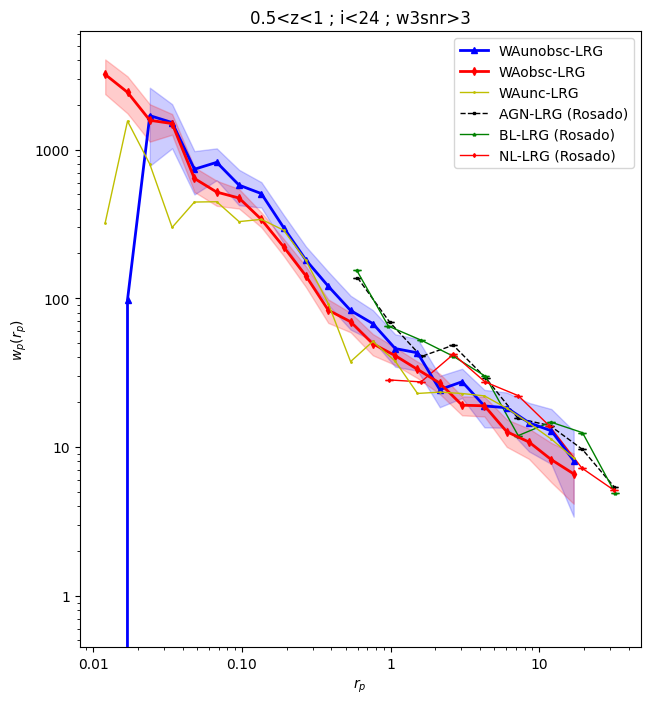

In [20]:
# Create figure and plot correlations
fig = plt.figure(1, figsize=(8,8))
cnt = gun.readcounts('hpwm_unobsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='b', label='WAunobsc-LRG',zorder=100,fill=True)
cnt = gun.readcounts('hpwm_obsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='r', label='WAobsc-LRG',zorder=100,fill=True)
cnt = gun.readcounts('hpwm_unc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='y', label='WAunc-LRG',zorder=100,fill=False, ploterrbar=False, linewidth=1, markersize=1)
gun.plotcf(xr, yr, 0, color='k', label='AGN-LRG (Rosado)',linewidth=1, markersize=2,zorder=1,linestyle='dashed')
gun.plotcf(xbl, ybl, 0, color='g', label='BL-LRG (Rosado)',linewidth=1, markersize=2,zorder=2)
gun.plotcf(xnl, ynl, 0, color='r', label='NL-LRG (Rosado)',linewidth=1, markersize=2,zorder=3)

plt.legend()
plt.xlabel(r'$r_p$')  ; plt.ylabel(r'$w_p(r_p)$')
plt.title('0.5<z<1 ; i<24 ; w3snr>3')
plt.gca().set_aspect('equal')
#plt.savefig('/home/edonoso/Downloads/cc1.png',dpi=600)

Counts object read from: unobsc_lrg_0510.cnt
Counts object read from: hpwm_unobsc_lrg_0510.cnt
Counts object read from: obsc_lrg_0510.cnt
Counts object read from: hpwm_obsc_lrg_0510.cnt


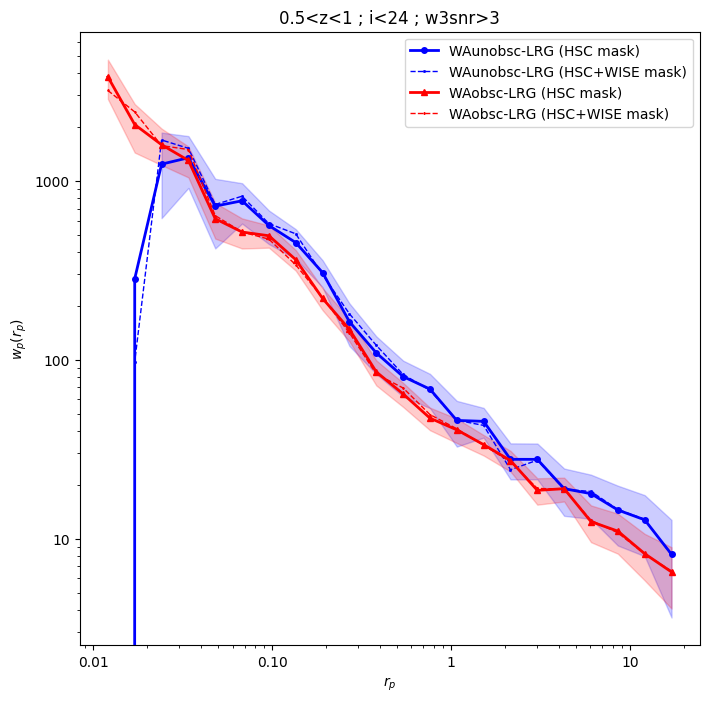

In [18]:
# Create figure and plot correlations
fig = plt.figure(1, figsize=(8,8))
cnt = gun.readcounts('unobsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='b', label='WAunobsc-LRG (HSC mask)',zorder=100,fill=True)
cnt = gun.readcounts('hpwm_unobsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='b', label='WAunobsc-LRG (HSC+WISE mask)',zorder=100, ploterrbar=False, linewidth=1, markersize=1, linestyle='--')

cnt = gun.readcounts('obsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='r', label='WAobsc-LRG (HSC mask)',zorder=100,fill=True)
cnt = gun.readcounts('hpwm_obsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='r', label='WAobsc-LRG (HSC+WISE mask)',zorder=100, ploterrbar=False, linewidth=1, markersize=1, linestyle='--')
plt.legend()
plt.xlabel(r'$r_p$')  ; plt.ylabel(r'$w_p(r_p)$')
plt.title('0.5<z<1 ; i<24 ; w3snr>3')
plt.gca().set_aspect('equal')
#plt.savefig('/home/edonoso/Downloads/cc1.png',dpi=600)

### Same CF, but for cross-controls: obscured AGN matched in z-mass to the unobscured

Counts object read from: hpwm_unobsc_lrg_0510.cnt
Counts object read from: hpwm_controlx_lrg_0510.cnt
Counts object read from: hpwm_obsc_lrg_0510.cnt


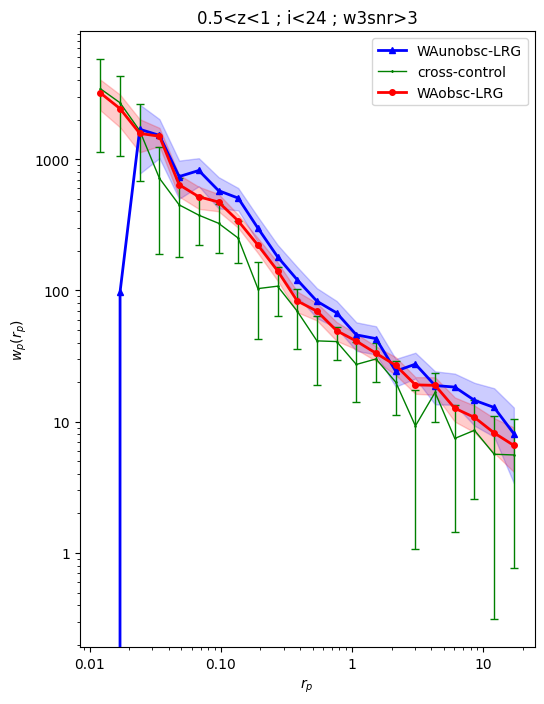

In [23]:
# Create figure and plot correlations
fig = plt.figure(1, figsize=(8,8))
cnt = gun.readcounts('hpwm_unobsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='b', label='WAunobsc-LRG',zorder=100,fill=True)
cnt = gun.readcounts('hpwm_controlx_lrg_0510.cnt')  # controlx_lrg_0510.cnt
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='g', label='cross-control',zorder=100, ploterrbar=True, linewidth=1, markersize=1)

cnt = gun.readcounts('hpwm_obsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='r', label='WAobsc-LRG',zorder=100,fill=True)
plt.legend()
plt.xlabel(r'$r_p$')  ; plt.ylabel(r'$w_p(r_p)$')
plt.title('0.5<z<1 ; i<24 ; w3snr>3')
plt.gca().set_aspect('equal')
#plt.savefig('/home/edonoso/Downloads/cc1.png',dpi=600)

### CF figure: for i<24, w3snr>3 plot (obs+unc) & (unobsc+unc) to check impact of uncertain objects

Counts object read from: hpwm_obsc_lrg_0510.cnt
Counts object read from: hpwm_obscPu_lrg_0510.cnt


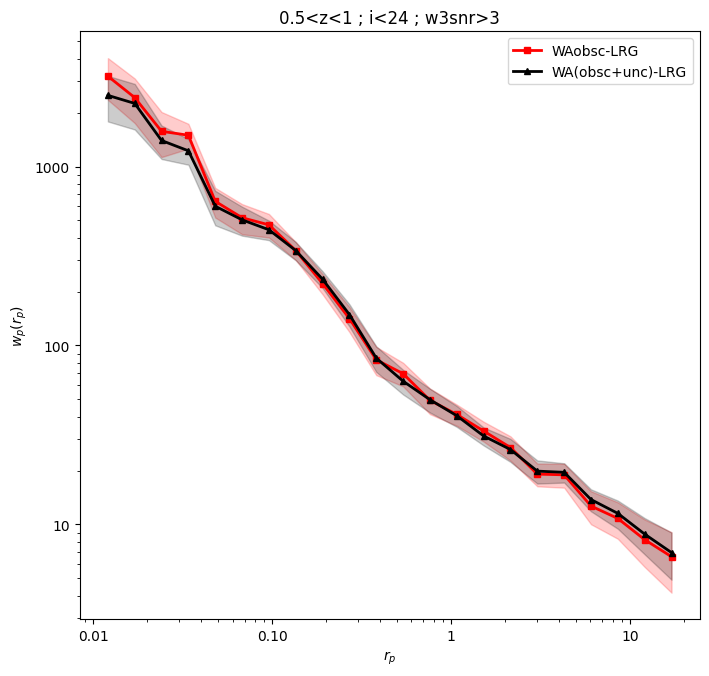

In [24]:
# Create figure and plot correlations
fig = plt.figure(1, figsize=(8,8))
#cnt = gun.readcounts('unobsc_lrg_0510.cnt')
#gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='b', label='WAunobsc-LRG',zorder=100,fill=True)
cnt = gun.readcounts('hpwm_obsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='r', label='WAobsc-LRG',zorder=100,fill=True)
cnt = gun.readcounts('hpwm_obscPu_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='k', label='WA(obsc+unc)-LRG',zorder=100,fill=True)
#gun.plotcf(xr, yr, 0, color='k', label='AGN-LRG (Rosado)',linewidth=1, markersize=2,zorder=1,linestyle='dashed')
#gun.plotcf(xbl, ybl, 0, color='g', label='BL-LRG (Rosado)',linewidth=1, markersize=2,zorder=2)
#gun.plotcf(xnl, ynl, 0, color='r', label='NL-LRG (Rosado)',linewidth=1, markersize=2,zorder=3)

plt.legend()
plt.xlabel(r'$r_p$')  ; plt.ylabel(r'$w_p(r_p)$')
plt.title('0.5<z<1 ; i<24 ; w3snr>3')
plt.gca().set_aspect('equal')
#plt.savefig('/home/edonoso/Downloads/cc1.png',dpi=600)

Counts object read from: hpwm_unobsc_lrg_0510.cnt
Counts object read from: hpwm_unobscPu_lrg_0510.cnt


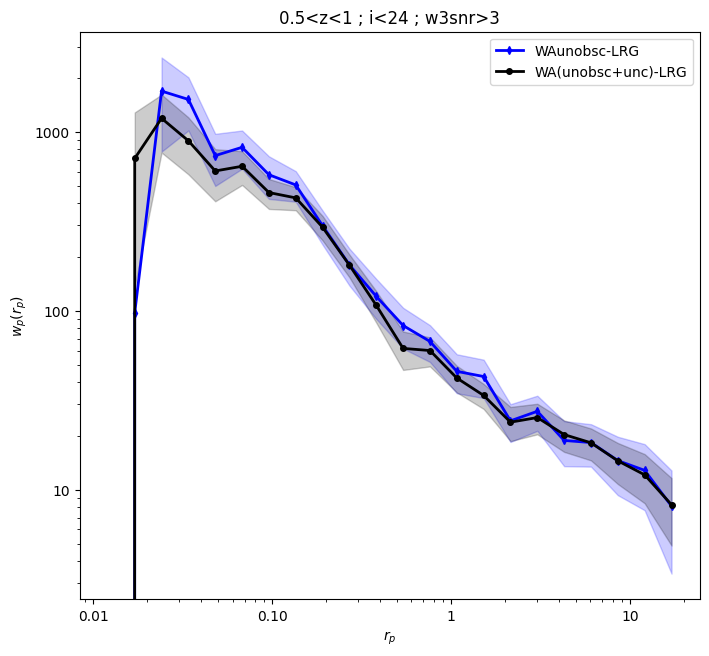

In [25]:
# Create figure and plot correlations
fig = plt.figure(1, figsize=(8,8))
cnt = gun.readcounts('hpwm_unobsc_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='b', label='WAunobsc-LRG',zorder=100,fill=True)
cnt = gun.readcounts('hpwm_unobscPu_lrg_0510.cnt')
gun.plotcf(cnt.rpm,cnt.wrp,cnt.wrperr,par=cnt.par, fac=1, color='k', label='WA(unobsc+unc)-LRG',zorder=100,fill=True)
#gun.plotcf(xr, yr, 0, color='k', label='AGN-LRG (Rosado)',linewidth=1, markersize=2,zorder=1,linestyle='dashed')
#gun.plotcf(xbl, ybl, 0, color='g', label='BL-LRG (Rosado)',linewidth=1, markersize=2,zorder=2)
#gun.plotcf(xnl, ynl, 0, color='r', label='NL-LRG (Rosado)',linewidth=1, markersize=2,zorder=3)

plt.legend()
plt.xlabel(r'$r_p$')  ; plt.ylabel(r'$w_p(r_p)$')
plt.title('0.5<z<1 ; i<24 ; w3snr>3')
plt.gca().set_aspect('equal')
#plt.savefig('/home/edonoso/Downloads/cc1.png',dpi=600)